In [2]:
from src.dataset import get_raw_training_data, get_raw_testing_data, get_labels
from src.spacy_helper import format_data_as_spacy, get_spacy_model, train, predict

from src.metrics import score
from src.visualization import plot_confusion_matrix

import numpy as np
import time

In [3]:
raw_training_data = get_raw_training_data('./data/training_set.json')
raw_testing_data = get_raw_testing_data('./data/testing_set.json')

labels = get_labels(raw_training_data)

y_true = [r['intent'] for r in raw_testing_data]
y_true_t = [r['intent'] for r in raw_training_data]

X_train, y_train = format_data_as_spacy(raw_training_data)
X_test, y_test = format_data_as_spacy(raw_testing_data)


model = get_spacy_model(labels)

model = train(model, X_train, y_train, 10, test=(X_test, y_test))
model.to_disk(f"./model")

Training the model...
Iteration 0/10. train_loss: 16.846657073649112 test score:37.49678452988736%
Iteration 1/10. train_loss: 1.0455854081374127 test score:62.68157729773903%
Iteration 2/10. train_loss: 0.22633777544251643 test score:69.25953467555097%
Iteration 3/10. train_loss: 0.07299201526984689 test score:73.29929627794121%
Iteration 4/10. train_loss: 0.04085296321682108 test score:73.14349442629529%
Iteration 5/10. train_loss: 0.025044287765467743 test score:74.10316543535322%
Iteration 6/10. train_loss: 0.02107628526255212 test score:74.88217902300468%
Iteration 7/10. train_loss: 0.01675337411052169 test score:76.46606667443321%
Iteration 8/10. train_loss: 0.01401151373306675 test score:76.451094773797%
Iteration 9/10. train_loss: 0.01214451361755664 test score:75.15108715639374%


In [4]:
y_pred = predict(model, X_test)
y_pred_t = predict(model, X_train)

In [5]:
training_results = score(y_true_t, y_pred_t)
testing_results = score(y_true, y_pred)

In [6]:
print(testing_results['report'])

                   precision    recall  f1-score   support

   find-around-me       0.63      0.57      0.60        67
      find-flight       0.80      0.83      0.82        24
       find-hotel       0.66      0.78      0.72        55
  find-restaurant       0.84      0.80      0.82        93
       find-train       0.68      0.81      0.74        21
       irrelevant       0.90      0.90      0.90       677
provide-showtimes       0.67      0.86      0.75        14
         purchase       0.70      0.66      0.68       114

         accuracy                           0.83      1065
        macro avg       0.73      0.77      0.75      1065
     weighted avg       0.83      0.83      0.83      1065



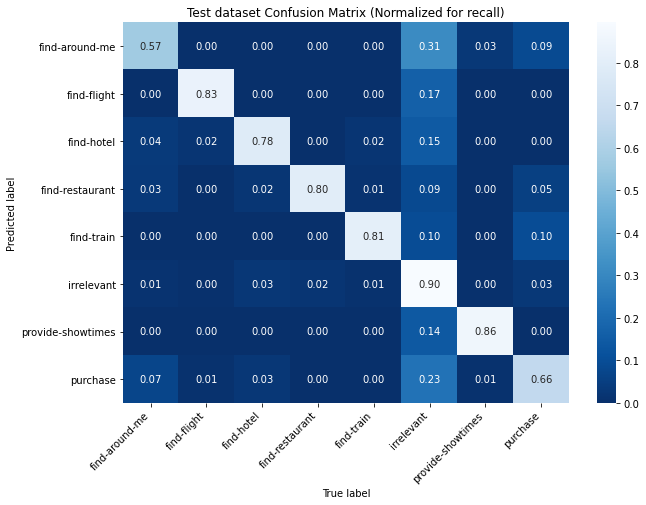

In [7]:
cm_testing_metrics = np.array(testing_results['cm'], dtype='float64')
for i in range(len(cm_testing_metrics)):
    cm_testing_metrics[i] = cm_testing_metrics[i] / np.sum(cm_testing_metrics[i])
plot_confusion_matrix(cm_testing_metrics, labels, title="Test dataset Confusion Matrix (Normalized for recall)", fmt=".2f")

In [8]:
print(training_results['report'])

                   precision    recall  f1-score   support

   find-around-me       0.99      0.98      0.98       383
      find-flight       0.97      1.00      0.99       142
       find-hotel       0.98      0.99      0.99       316
  find-restaurant       0.98      0.97      0.98       469
       find-train       0.95      0.98      0.97       143
       irrelevant       1.00      0.99      0.99      3852
provide-showtimes       0.92      1.00      0.96       117
         purchase       0.97      0.99      0.98       613

         accuracy                           0.99      6035
        macro avg       0.97      0.99      0.98      6035
     weighted avg       0.99      0.99      0.99      6035



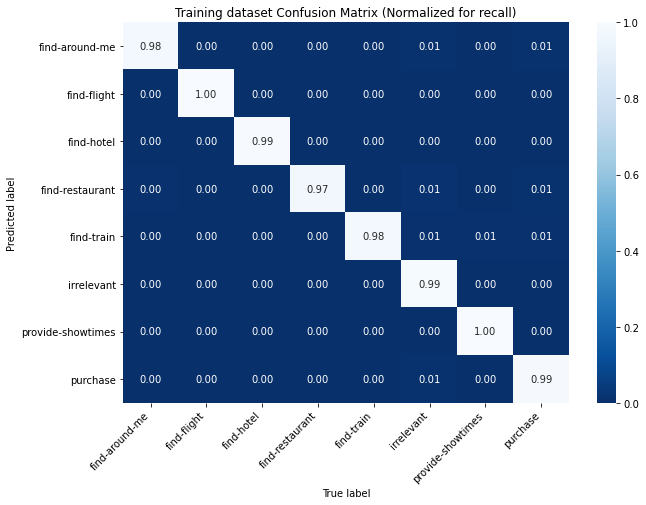

In [9]:
cm_testing_metrics = np.array(training_results['cm'], dtype='float64')
for i in range(len(cm_testing_metrics)):
    cm_testing_metrics[i] = cm_testing_metrics[i] / np.sum(cm_testing_metrics[i])
plot_confusion_matrix(cm_testing_metrics, labels, title="Training dataset Confusion Matrix (Normalized for recall)", fmt=".2f")

# With the Augmented Training set

In [20]:
raw_training_data = get_raw_training_data('./data/augmented_training_set.json')

for r in raw_training_data:
    if "message" in r:
        r["sentence"] = r["message"]

y_true_t = [r['intent'] for r in raw_training_data]

X_train, y_train = format_data_as_spacy(raw_training_data)

model = get_spacy_model(labels)

model = train(model, X_train, y_train, 18, test=(X_test, y_test))
model.to_disk(f"./model_augmented")

Training the model...
Iteration 0/20. train_loss: 20.547011772054248 test score:37.81155459619273%
Iteration 1/20. train_loss: 1.0265528463060036 test score:60.25206086105875%
Iteration 2/20. train_loss: 0.2047727388999192 test score:69.39759415927655%
Iteration 3/20. train_loss: 0.06084290246872115 test score:73.92411943924922%
Iteration 4/20. train_loss: 0.037716852906669374 test score:74.6300758458806%
Iteration 5/20. train_loss: 0.030665445771774102 test score:78.89506086316892%
Iteration 6/20. train_loss: 0.023470643395967272 test score:76.84242036540432%
Iteration 7/20. train_loss: 0.016647473581315353 test score:74.90794081308472%
Iteration 8/20. train_loss: 0.015177943336084354 test score:76.42127877378562%
Iteration 9/20. train_loss: 0.01160478223954442 test score:76.65671794998582%
Iteration 10/20. train_loss: 0.013310312959669446 test score:73.08303043925669%
Iteration 11/20. train_loss: 0.009254874743959363 test score:75.09898129972153%
Iteration 12/20. train_loss: 0.008324

In [21]:
y_pred = predict(model, X_test)
y_pred_t = predict(model, X_train)

In [22]:
training_results = score(y_true_t, y_pred_t)
testing_results = score(y_true, y_pred)

In [23]:
print(testing_results['report'])

                   precision    recall  f1-score   support

   find-around-me       0.75      0.64      0.69        67
      find-flight       0.77      0.83      0.80        24
       find-hotel       0.72      0.84      0.77        55
  find-restaurant       0.85      0.74      0.79        93
       find-train       0.52      0.81      0.63        21
       irrelevant       0.90      0.90      0.90       677
provide-showtimes       0.65      0.79      0.71        14
         purchase       0.73      0.69      0.71       114

         accuracy                           0.84      1065
        macro avg       0.74      0.78      0.75      1065
     weighted avg       0.84      0.84      0.84      1065



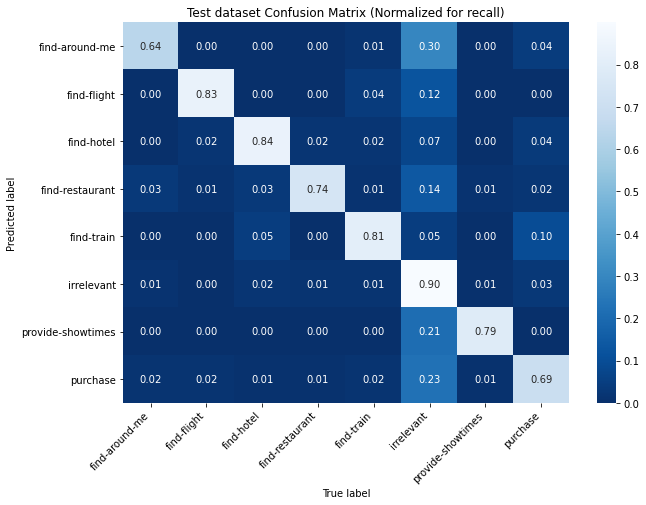

In [24]:
cm_testing_metrics = np.array(testing_results['cm'], dtype='float64')
for i in range(len(cm_testing_metrics)):
    cm_testing_metrics[i] = cm_testing_metrics[i] / np.sum(cm_testing_metrics[i])
plot_confusion_matrix(cm_testing_metrics, labels, title="Test dataset Confusion Matrix (Normalized for recall)", fmt=".2f")